In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
from factor_analyzer import FactorAnalyzer

### Data Cleaning and Preprocessing

In [2]:
df = pd.read_csv("C:/Users/USER/Desktop/BigData/FactorAnalysis.csv")
df.head()

,Academic record,Appearance,Communication,Company Fit,Experience,Job Fit,Letter,Likeability,Organization,Potential,Resume,Self-Confidence
0,6.0,8.0,7.0,5.0,6.0,5.0,7.0,7.0,7.0,6.0,7.0,7.0
1,9.0,8.0,8.0,8.0,10.0,9.0,8.0,9.0,8.0,9.0,9.0,9.0
2,6.0,7.0,7.0,6.0,6.0,7.0,7.0,8.0,8.0,6.0,6.0,8.0
3,7.0,8.0,6.0,5.0,8.0,5.0,9.0,8.0,7.0,8.0,7.0,7.0
4,4.0,7.0,8.0,6.0,6.0,6.0,6.0,7.0,8.0,5.0,4.0,6.0


In [3]:
df.tail()

,Academic record,Appearance,Communication,Company Fit,Experience,Job Fit,Letter,Likeability,Organization,Potential,Resume,Self-Confidence
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,8.0,7.0,6.0,7.0,9.0,6.0,8.0,9.0,7.0,9.0,8.0,8.0
54,6.0,7.0,6.0,8.0,7.0,7.0,7.0,8.0,6.0,6.0,8.0,8.0
55,8.0,7.0,5.0,5.0,9.0,6.0,7.0,6.0,5.0,8.0,8.0,7.0
56,7.0,8.0,10.0,8.0,8.0,8.0,9.0,7.0,9.0,7.0,10.0,8.0


In [4]:
df.describe()

,Academic record,Appearance,Communication,Company Fit,Experience,Job Fit,Letter,Likeability,Organization,Potential,Resume,Self-Confidence
count,55.000000,55.000000,56.000000,55.000000,54.000000,56.000000,56.000000,56.00000,56.000000,56.000000,56.000000,56.000000
mean,7.327273,7.454545,6.928571,6.836364,7.203704,7.017857,7.232143,7.37500,6.946429,7.267857,7.232143,7.303571
std,1.347900,0.977870,1.412376,1.584224,1.392427,1.554946,1.651347,1.07132,1.530533,1.368358,1.768318,1.158677
min,4.000000,5.000000,3.000000,3.000000,5.000000,3.000000,4.000000,4.00000,3.000000,4.000000,4.000000,5.000000
25%,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.00000,6.000000,6.000000,6.000000,7.000000
50%,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.500000,7.000000,7.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.00000,9.000000,10.000000,10.000000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Academic record  55 non-null     float64
 1   Appearance       55 non-null     float64
 2   Communication    56 non-null     float64
 3   Company Fit      55 non-null     float64
 4   Experience       54 non-null     float64
 5   Job Fit          56 non-null     float64
 6   Letter           56 non-null     float64
 7   Likeability      56 non-null     float64
 8   Organization     56 non-null     float64
 9   Potential        56 non-null     float64
 10  Resume           56 non-null     float64
 11  Self-Confidence  56 non-null     float64
dtypes: float64(12)
memory usage: 5.5 KB


In [6]:
df.isna().sum()

Academic record    2
Appearance         2
Communication      1
Company Fit        2
Experience         3
Job Fit            1
Letter             1
Likeability        1
Organization       1
Potential          1
Resume             1
Self-Confidence    1
dtype: int64

In [7]:
df.duplicated().sum()

3

In [8]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34     True
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
dtype: bool

In [9]:
df_cleaned = df.dropna()
df_cleaned.head()

,Academic record,Appearance,Communication,Company Fit,Experience,Job Fit,Letter,Likeability,Organization,Potential,Resume,Self-Confidence
0,6.0,8.0,7.0,5.0,6.0,5.0,7.0,7.0,7.0,6.0,7.0,7.0
1,9.0,8.0,8.0,8.0,10.0,9.0,8.0,9.0,8.0,9.0,9.0,9.0
2,6.0,7.0,7.0,6.0,6.0,7.0,7.0,8.0,8.0,6.0,6.0,8.0
3,7.0,8.0,6.0,5.0,8.0,5.0,9.0,8.0,7.0,8.0,7.0,7.0
4,4.0,7.0,8.0,6.0,6.0,6.0,6.0,7.0,8.0,5.0,4.0,6.0


In [10]:
df_cleaned.isna().sum()

Academic record    0
Appearance         0
Communication      0
Company Fit        0
Experience         0
Job Fit            0
Letter             0
Likeability        0
Organization       0
Potential          0
Resume             0
Self-Confidence    0
dtype: int64

In [11]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.head()

,Academic record,Appearance,Communication,Company Fit,Experience,Job Fit,Letter,Likeability,Organization,Potential,Resume,Self-Confidence
0,6.0,8.0,7.0,5.0,6.0,5.0,7.0,7.0,7.0,6.0,7.0,7.0
1,9.0,8.0,8.0,8.0,10.0,9.0,8.0,9.0,8.0,9.0,9.0,9.0
2,6.0,7.0,7.0,6.0,6.0,7.0,7.0,8.0,8.0,6.0,6.0,8.0
3,7.0,8.0,6.0,5.0,8.0,5.0,9.0,8.0,7.0,8.0,7.0,7.0
4,4.0,7.0,8.0,6.0,6.0,6.0,6.0,7.0,8.0,5.0,4.0,6.0


In [12]:
df_cleaned.duplicated().sum()

0

In [13]:
print(df_cleaned.columns)
print(df_cleaned.index)

Index(['Academic record', 'Appearance', 'Communication', 'Company Fit',
       'Experience', 'Job Fit', 'Letter', 'Likeability', 'Organization',
       'Potential', 'Resume', 'Self-Confidence'],
      dtype='object')
Index([ 0,  1,  2,  3,  4,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56],
      dtype='int64')


In [14]:
df_cleaned.shape

(50, 12)

### Start Factor Anayzing

In [15]:
fa = FactorAnalyzer(n_factors=3, rotation=None)

In [16]:
fa.fit(df_cleaned)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [17]:
factor_score = fa.transform(df_cleaned)

In [18]:
print(pd.DataFrame(factor_score, columns=['Factor1', 'Factor2', 'Factor3']))

     Factor1   Factor2   Factor3
0  -0.610491 -0.607088  0.811590
1   1.373064  0.135674 -0.827947
2  -0.265977 -1.158053  0.898808
3   0.173422  0.943746  0.721393
4  -1.142362 -1.645544  0.813745
5  -0.711235 -1.415641 -0.655064
6  -0.322490  0.929281  0.549465
7  -0.865093  1.283463 -0.095247
8   1.037165  0.914555  1.332911
9  -0.182167 -0.811773  1.414805
10 -0.158520 -1.922368  0.842081
11 -1.465614  1.295256 -0.371153
12 -2.102388 -1.052479  0.048907
13  1.895574  0.742273  0.225553
14  0.539141  0.736379  0.645498
15 -2.043397  0.153449 -0.974472
16 -0.682475  1.041241 -2.109507
17  1.072853 -0.469707 -1.065913
18 -0.520157  0.752383 -0.882074
19  1.481906 -0.618114 -0.636379
20  1.704911  0.814551  0.500997
21 -0.835780 -0.197654 -1.791142
22  0.079374 -1.052091 -1.357351
23 -1.049778  0.046438 -1.192094
24  0.192281 -0.790863 -0.351299
25 -0.077819 -1.786915 -0.996723
26  0.804333  0.501478  1.284774
27  0.317643 -0.652352 -1.085713
28 -0.789276  0.471390  1.221152
29  0.6964

In this stage, factor scores are computed for every observation within the dataset, reflecting the approximated values of latent factors assigned to each individual.

In [29]:
pd.DataFrame(fa.loadings_, columns=['Factor1', 'Factor2', 'Factor3'])

,Factor1,Factor2,Factor3
0,0.704377,0.230115,-0.312184
1,0.677752,-0.199460,-0.030283
2,0.693536,-0.409665,0.184575
3,0.772166,-0.093757,-0.043946
4,0.629016,0.491318,-0.208657
5,0.785608,0.020151,-0.104399
6,0.644775,0.408517,0.641518
7,0.700482,-0.219821,-0.000668
8,0.701990,-0.550007,0.125485
9,0.824943,0.235139,-0.414502


During this phase, I extract and present the factor loadings, which indicate both the magnitude and direction of the association between each observed variable and the latent factors.

In [20]:
ev, v = fa.get_eigenvalues()
print("Eigen Vectors")
print(ev)
print("Eigen Values")
print(v)

Eigen Vectors
[6.3876438  1.48846472 1.10447808 1.05164512 0.63250779 0.36695649
 0.30158363 0.21291441 0.15571561 0.13792457 0.08512934 0.07503646]
Eigen Values
[ 6.07403911  1.2232383   0.95450926  0.64417437  0.27329287  0.03435746
  0.00945906 -0.08946271 -0.12879384 -0.17971332 -0.25349849 -0.30819805]


It extracts eigenvalues and eigenvectors from the factor analysis model using the get_eigenvalues() method. Eigenvalues, stored in the variable ev, represent the variance explained by each factor, while eigenvectors, stored in the variable v, provide information about the direction and strength of these factors.

In [21]:
fa.get_factor_variance()

(array([6.07543322, 1.22412854, 0.95384228]),
 array([0.5062861 , 0.10201071, 0.07948686]),
 array([0.5062861 , 0.60829681, 0.68778367]))

The method likely returns information about the variance explained by the identified factors.

In [22]:
correlation = fa.corr_
correlation

array([[1.        , 0.4701427 , 0.40540675, 0.49921833, 0.66723896,
        0.53934351, 0.32694569, 0.39901338, 0.35789909, 0.79519787,
        0.46064185, 0.40677173],
       [0.4701427 , 1.        , 0.49397198, 0.41708061, 0.30994655,
        0.41057625, 0.30349166, 0.6392098 , 0.53701931, 0.51335411,
        0.49863091, 0.69670651],
       [0.40540675, 0.49397198, 1.        , 0.59073869, 0.19600945,
        0.50508081, 0.4033781 , 0.49004375, 0.86179762, 0.42060293,
        0.42553356, 0.43094271],
       [0.49921833, 0.41708061, 0.59073869, 1.        , 0.39596781,
        0.88205803, 0.45394382, 0.48428122, 0.62230511, 0.65864258,
        0.44321897, 0.4616973 ],
       [0.66723896, 0.30994655, 0.19600945, 0.39596781, 1.        ,
        0.52245009, 0.48002481, 0.30588382, 0.17321088, 0.70355416,
        0.51724399, 0.40378816],
       [0.53934351, 0.41057625, 0.50508081, 0.88205803, 0.52245009,
        1.        , 0.46520769, 0.53055212, 0.52748727, 0.70576351,
        0.46078966,

provides a comprehensive overview of the relationships between the observed variables in the dataset. Analyzing this correlation matrix can offer insights into the patterns and strengths of associations among the variables

In [23]:
factor_correlation_matrix = np.corrcoef(factor_score.T)
factor_correlation_df = pd.DataFrame(factor_correlation_matrix, columns=['Factor1', 'Factor2', 'Factor3'])
print("Factor Correlation Matrix")
print(factor_correlation_df)

Factor Correlation Matrix
    Factor1   Factor2   Factor3
0  1.000000  0.022795  0.008870
1  0.022795  1.000000  0.075435
2  0.008870  0.075435  1.000000


it make the same but after *Factorization*

In [24]:
factor_score.shape

(50, 3)

### Visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

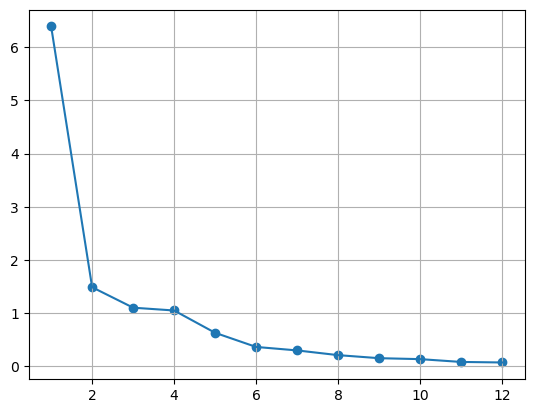

In [26]:
plt.scatter(range(1,df.shape[1]+1), ev)
plt.plot(range(1,df.shape[1]+1), ev)
plt.grid()
plt.show()

### Before Factorization

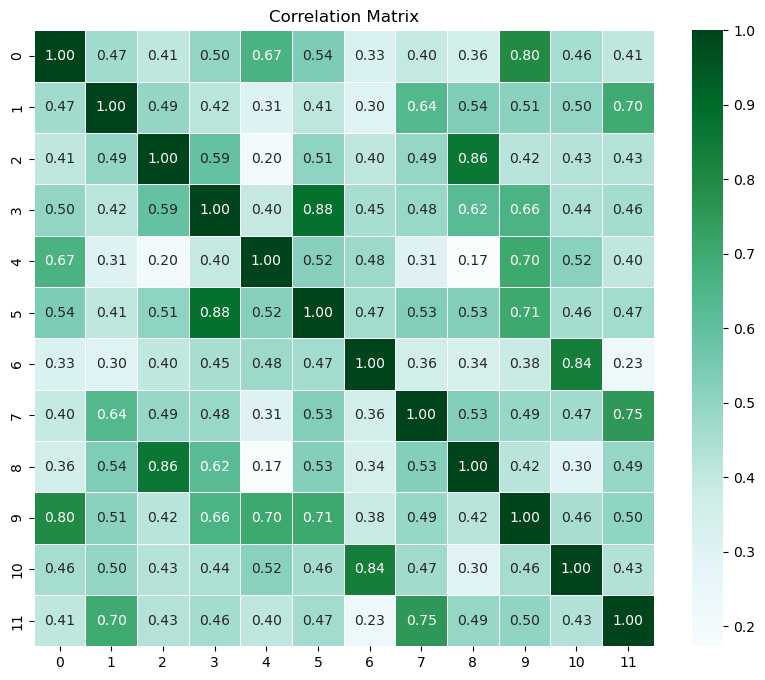

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='BuGn', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### After Factorization

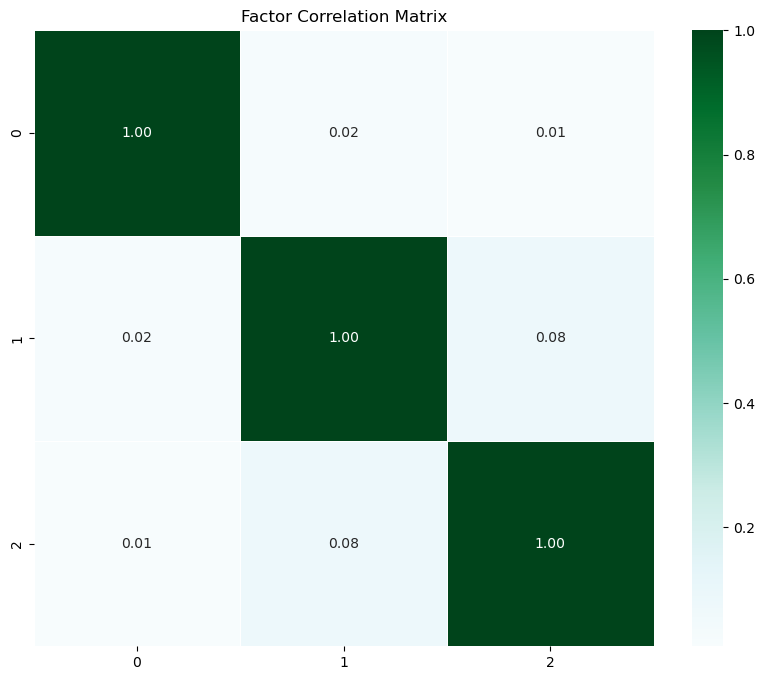

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(factor_correlation_matrix, annot=True, cmap='BuGn', fmt='.2f', linewidths=0.5)
plt.title('Factor Correlation Matrix')
plt.show()